In [76]:
import warnings
from sklearn.cluster import AgglomerativeClustering

warnings.filterwarnings('ignore')

In [77]:
from methods_agglomerative import Modeling_Agglomerative
methods = Modeling_Agglomerative()

In [78]:
df_scaled = methods.import_df('df_scaled')
df_scaled.set_index('country', inplace=True)

In [79]:
df_scaled

,Unnamed: 0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Afghanistan,0,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962
Albania,1,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736
Algeria,2,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523
Angola,3,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329
Antigua and Barbuda,4,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,162,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922
Venezuela,163,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332
Vietnam,164,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607


In [80]:
df_scaled.drop(columns='Unnamed: 0',inplace=True)

### **Quantidade de clusters ideal verificada pelo método do cotovelo.**

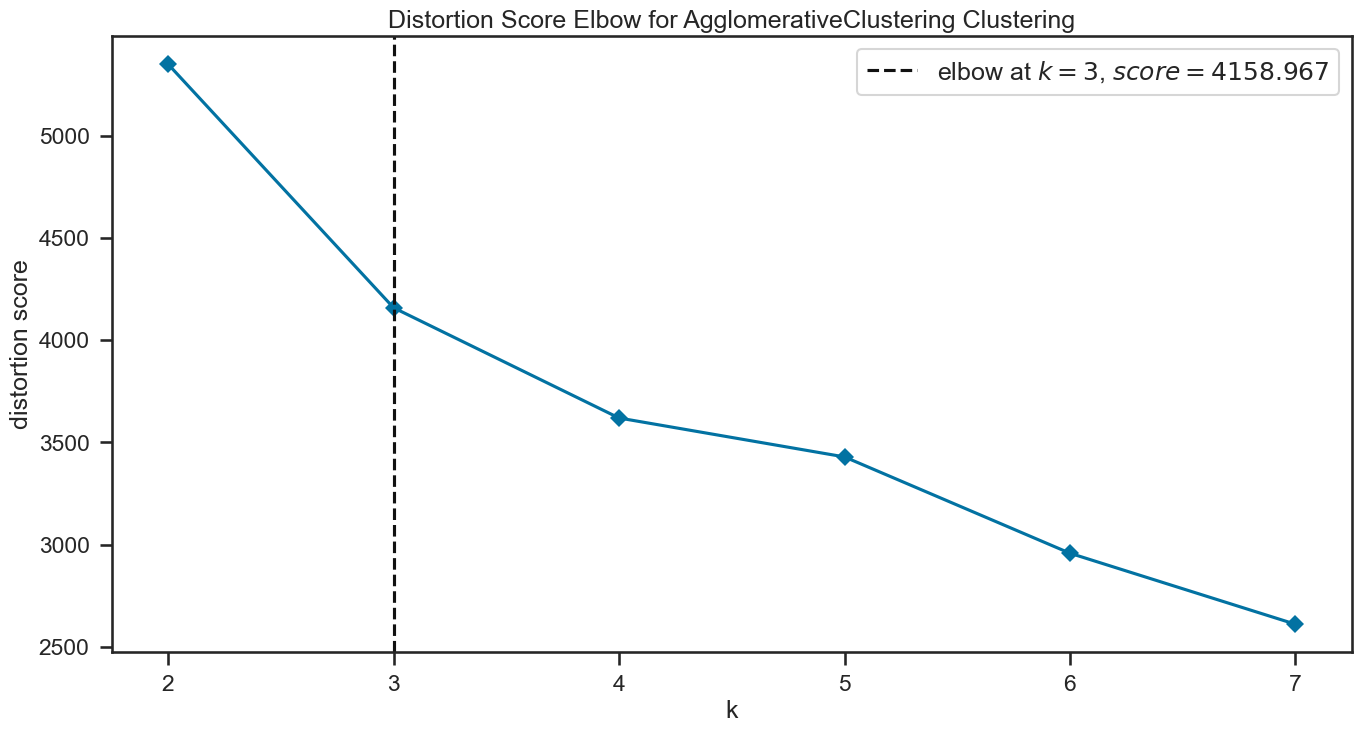

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
methods.ideal_clusters(df_scaled, AgglomerativeClustering())

**Veja que o método do cotovelo mostra que 3 clusters é o ideal para este tratamento.**

In [82]:
cluster_hierarchical = methods.clustering_hierarchical(df_scaled, 3)
df_scaled['cluster_hierarchical'] = cluster_hierarchical
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hierarchical
country,,,,,,,,,,
Afghanistan,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962,1
Albania,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736,2
Algeria,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523,2
Angola,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329,1
Antigua and Barbuda,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687,2
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922,1
Venezuela,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332,1
Vietnam,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607,2


In [83]:
methods.count_clusters(df_scaled, 'cluster_hierarchical')

Quantidade de países do cluster 1 é 66.
Quantidade de países do cluster 2 é 66.
Quantidade de países do cluster 0 é 34.


In [84]:
methods.metrics_model(df_scaled, 3)

*********************************************
Índice de Davies-Bouldin: 1.2139207873046616


In [85]:
df_scaled.reset_index(inplace=True)

********************************************************************************
A quantidade de países no CLUSTER 1 é 66 e são eles: 

 ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Yemen', 'Zambia']
*********************************************

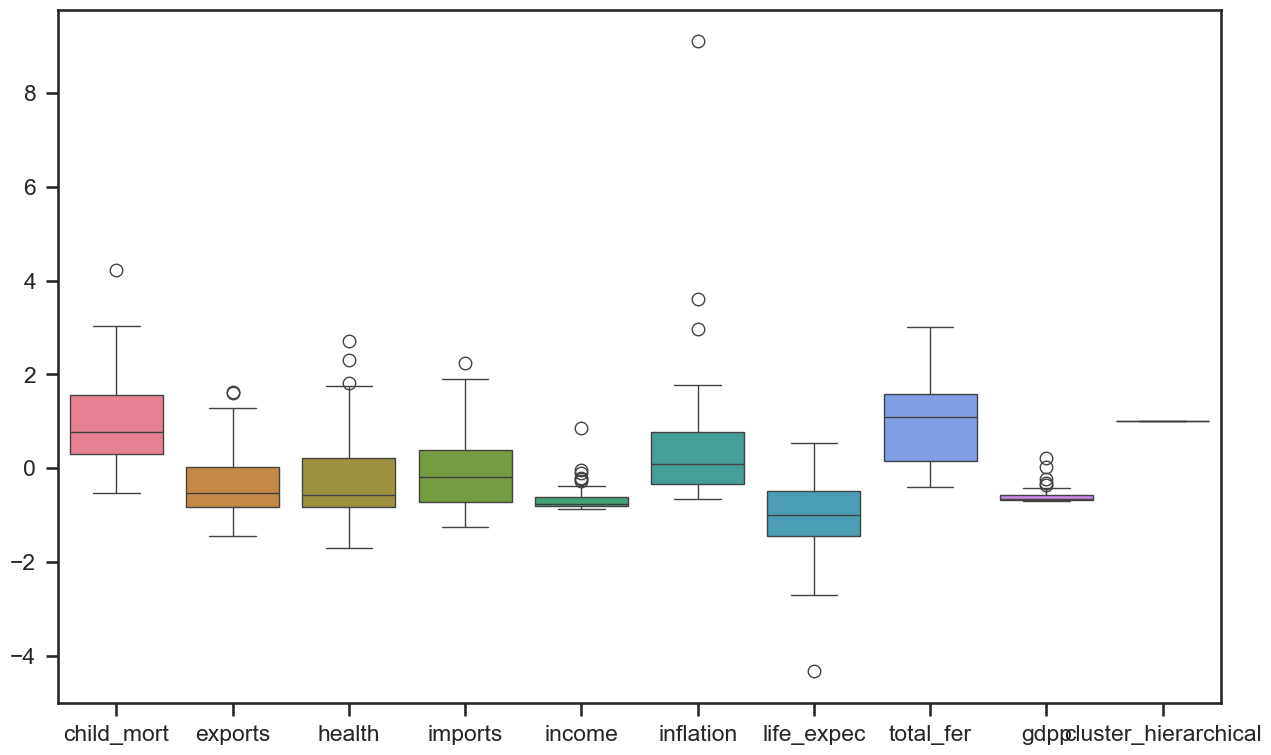

********************************************************************************
A quantidade de países no CLUSTER 2 é 66 e são eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Georgia', 'Grenada', 'Guatemala', 'Hungary', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Vietnam']
******************************

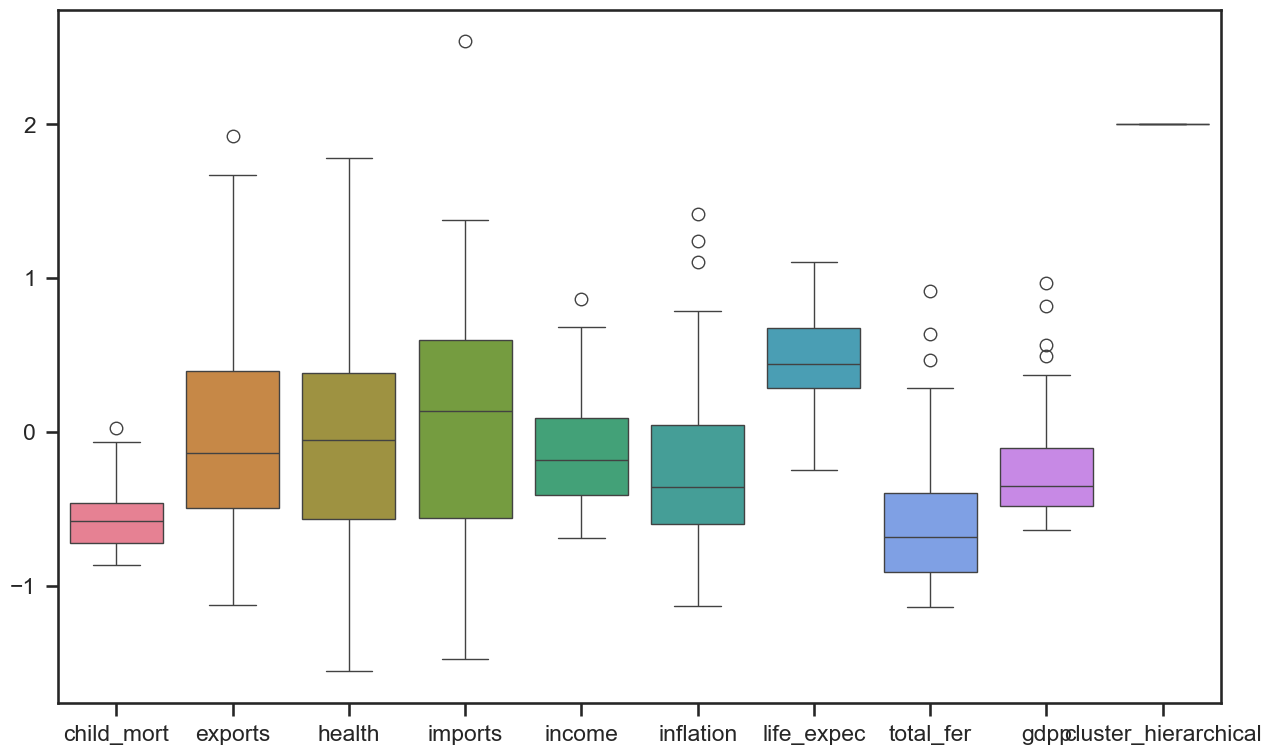

********************************************************************************
A quantidade de países no CLUSTER 0 é 34 e são eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
********************************************************************************
Estatísticas descritivas do CLUSTER 0

********************************************************************************
       child_mort    exports     health    imports     income  inflation  \
count   34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    -0.798232   0.630028   0.608751   0.072311   1.577305  -0.347267   
std      0.088322   1.581271   

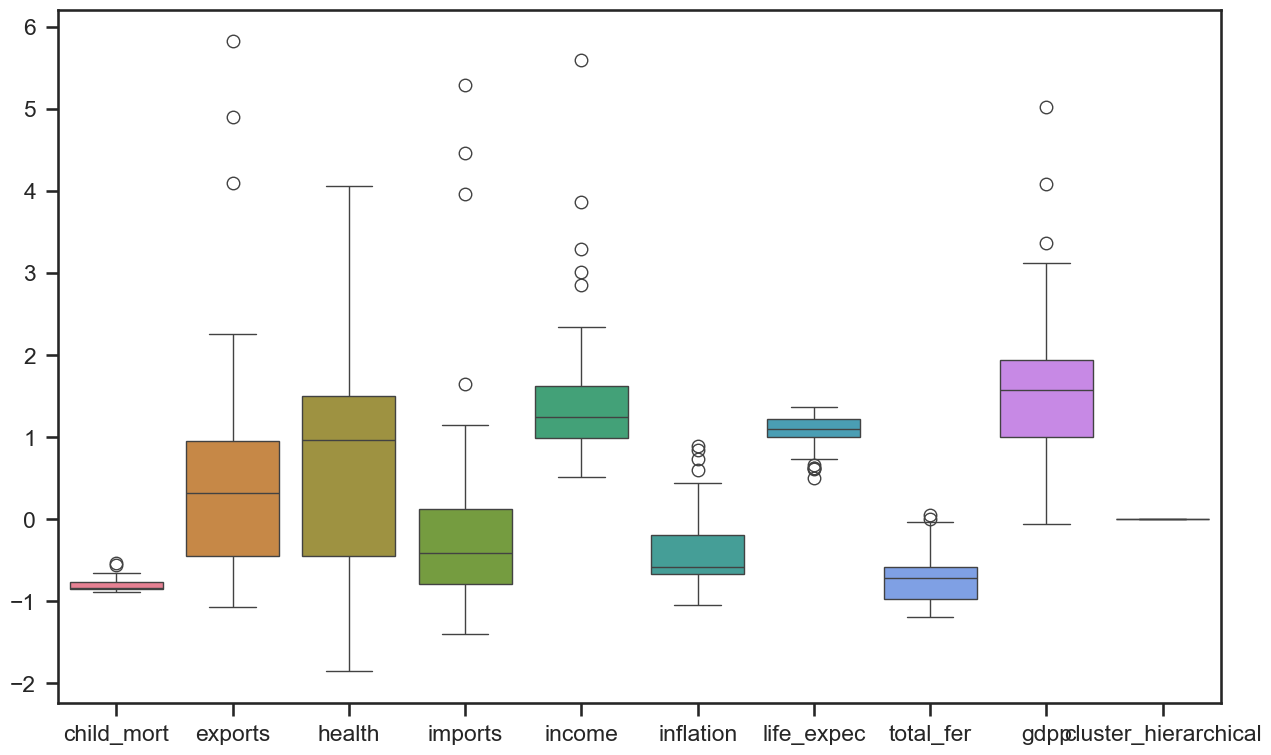

In [86]:
methods.report_clustering(df_scaled, 'cluster_hierarchical')

**Foi mostrado em Data Preparation (_heatmap_) que há forte correlação entre algumas variáveis, o que pode produzir enviesamento nos resultados. Para isso será aplicado uma PCA que não ofereça perda significativa. Além disso, vou me basear num intervalo de confiança de 95% e usar 6 componentes para ver qual o percentual da base que o método vai representar.**

In [87]:
df_pca = methods.pca_method(df_scaled.drop(columns='country'), 6)

(<Figure size 800x550 with 2 Axes>, <Axes: >, <Axes: >)

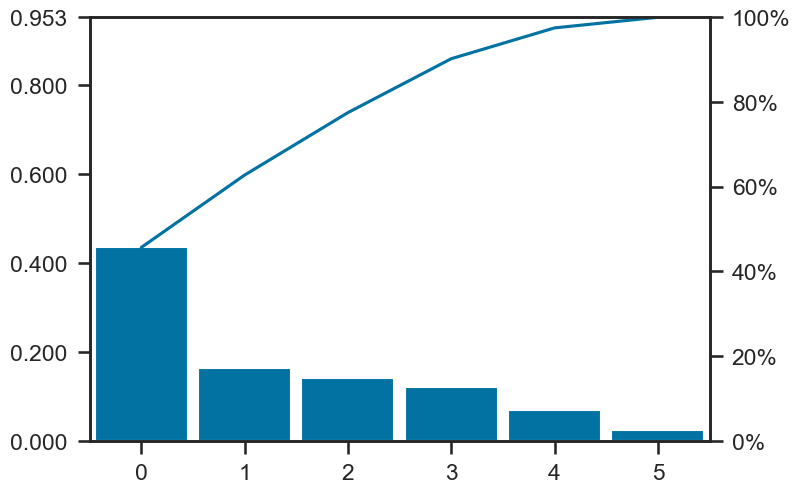

In [88]:
methods.pca_(df_scaled.drop(columns='country'), 6)

**Veja que a escolha por 6 componentes é bem representativa, tendo em vista que ficou ligeiramente acima do intervalo de confiança assumido anteriormente.**

##### **Quantidade de clusters ideal verificada pelo método do cotovelo - com PCA aplicada no modelo**

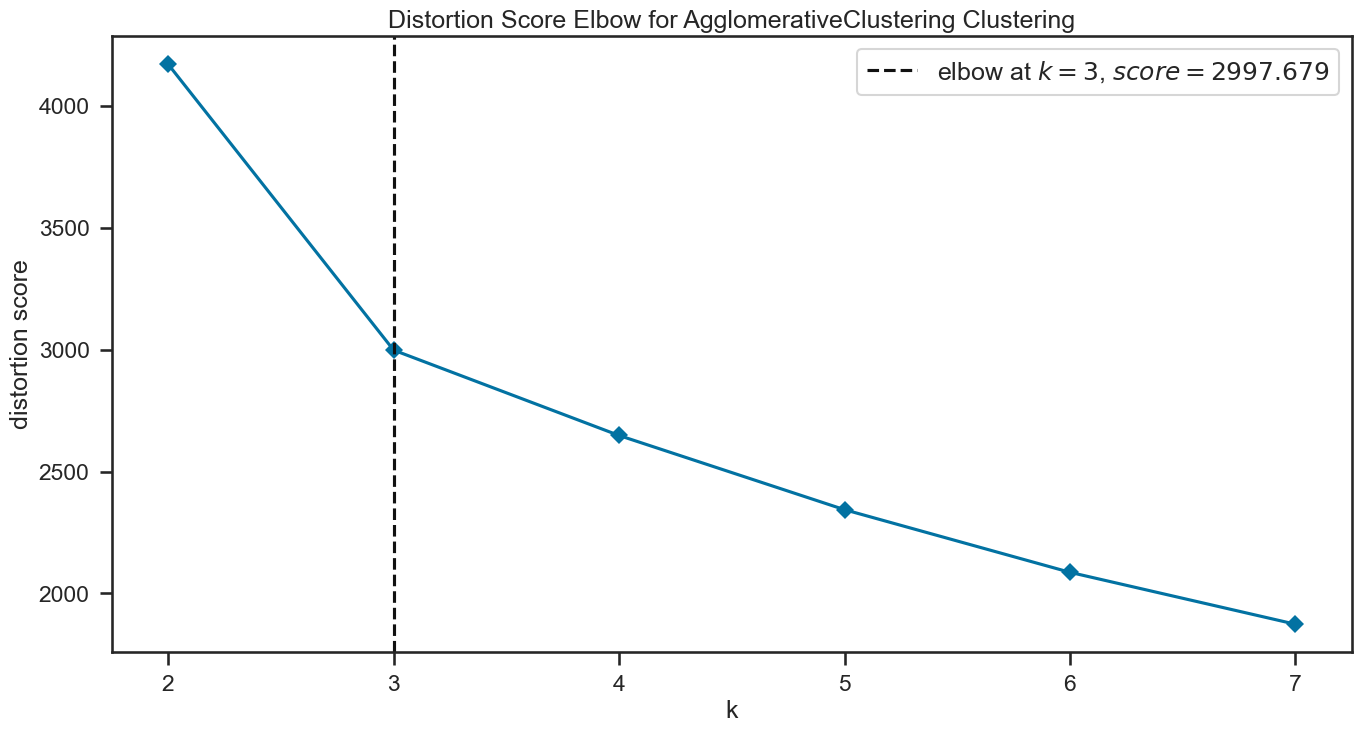

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
methods.ideal_clusters(df_pca, AgglomerativeClustering())

**Igualmente ao caso anterior (sem uso da PCA), o método do cotovelo também mostra que 3 clusters é o ideal para este tratamento.**

In [90]:
cluster_hierarchical_pca = methods.clustering_hierarchical(df_pca, 3)
df_pca['cluster_hierarchical_pca'] = cluster_hierarchical_pca
df_pca

,0,1,2,3,4,5,cluster_hierarchical_pca
0,-2.880773,0.090396,0.807903,-1.061901,-0.065009,-0.190244,1
1,0.324538,-0.668349,-1.441126,0.209622,0.032219,0.070790,2
2,-0.375635,-0.475147,-0.634890,1.554744,0.071283,-0.247021,2
3,-2.889904,1.775848,1.386268,1.052229,-0.142124,-0.343281,1
4,0.930763,0.071215,-1.205110,0.182769,-0.255845,-0.072416,2
...,...,...,...,...,...,...,...
161,-0.818284,0.622498,-0.523280,-0.167748,-0.548347,-0.207338,2
162,-0.536602,-1.158388,1.015017,3.000728,2.003879,-0.092492,1
163,0.390802,1.302262,-1.538828,0.252959,1.070073,0.000336,2
164,-1.867361,-0.077799,0.602486,1.007112,0.563324,-0.605794,1


In [91]:
methods.count_clusters(df_pca, 'cluster_hierarchical_pca')

Quantidade de países do cluster 2 é 81.
Quantidade de países do cluster 1 é 51.
Quantidade de países do cluster 0 é 34.


In [92]:
methods.metrics_model(df_pca.drop(columns='cluster_hierarchical_pca'), 3)

*********************************************
Índice de Davies-Bouldin: 1.131569871279731


In [93]:
df_pca['country'] = df_scaled['country']

********************************************************************************
A quantidade de países no CLUSTER 1 é 51 e são eles: 

 ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Venezuela', 'Yemen', 'Zambia']
********************************************************************************
Estatísticas descritivas do CLUSTER 1

********************************************************************************


               0          1          2          3          4          5  \
count  51.000000  51.000000  51.000000  51.000000  51.000000  51.000000   
mean   -2.277449   0.378315   0.689033  -0.304999   0.050089  -0.018690   
std     0.951116   0.822692   0.695728   1.413446   1.198795   0.675870   
min    -4.840256  -1.172599  -0.374981  -2.776150  -1.687614  -1.320535   
25%    -2.884203  -0.136325   0.229616  -0.950996  -0.714265  -0.344325   
50%    -2.291568   0.350861   0.634694  -0.530160  -0.142124  -0.173359   
75%    -1.683434   0.921870   1.026213   0.296387   0.476976   0.212865   
max    -0.382730   2.460735   3.915526   4.966621   5.650585   3.074467   

       cluster_hierarchical_pca  
count                      51.0  
mean                        1.0  
std                         0.0  
min                         1.0  
25%                         1.0  
50%                         1.0  
75%                         1.0  
max                         1.0  
******************

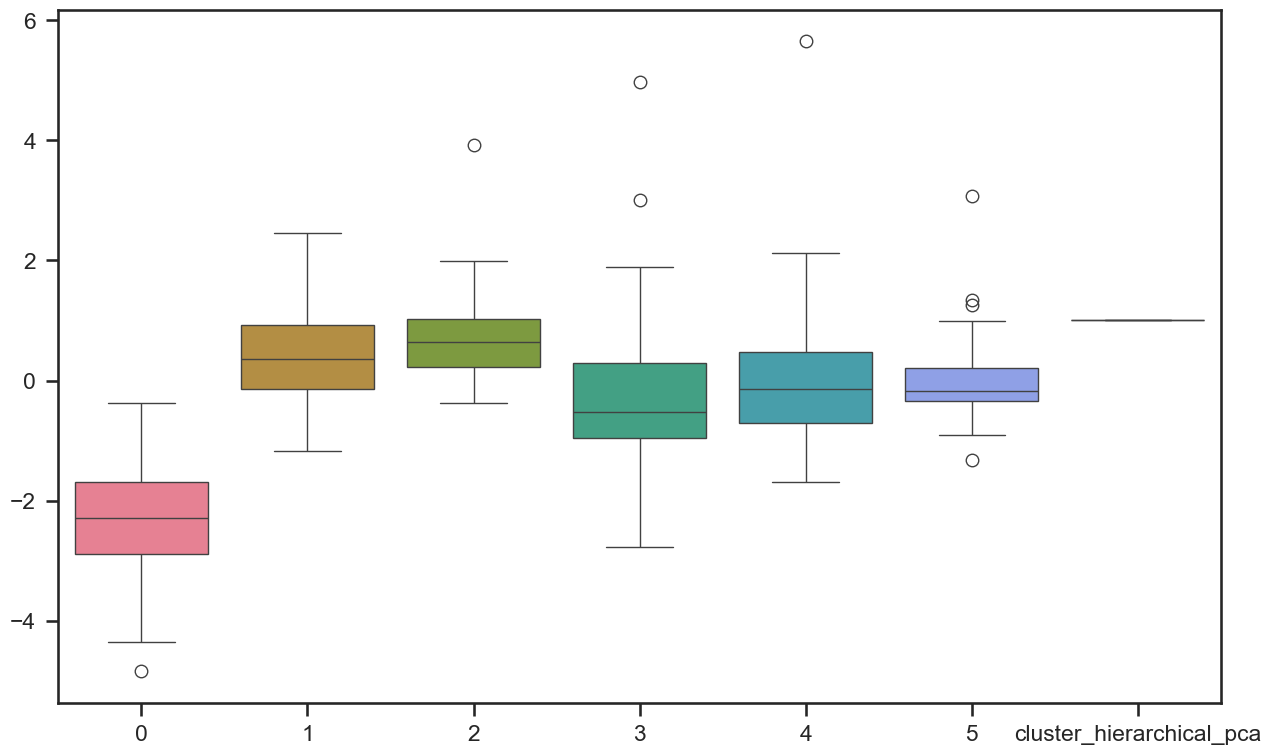

********************************************************************************
A quantidade de países no CLUSTER 2 é 81 e são eles: 

 ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Korea', 'Sri Lanka', 'St. V

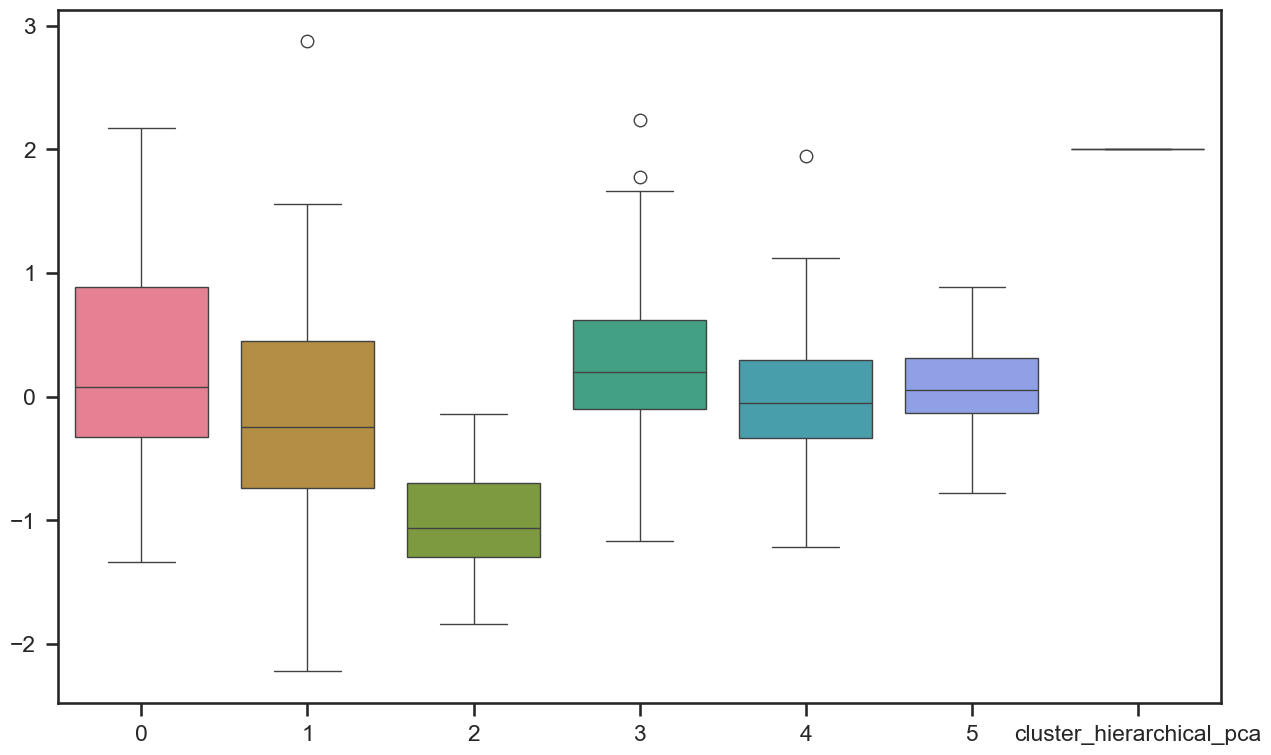

********************************************************************************
A quantidade de países no CLUSTER 0 é 34 e são eles: 

 ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Libya', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
********************************************************************************
Estatísticas descritivas do CLUSTER 0

********************************************************************************
               0          1          2          3          4          5  \
count  34.000000  34.000000  34.000000  34.000000  34.000000  34.000000   
mean    2.806340  -0.170851   1.321521  -0.164642  -0.138333  -0.136476   
std     1.252631   2.109030   0.82

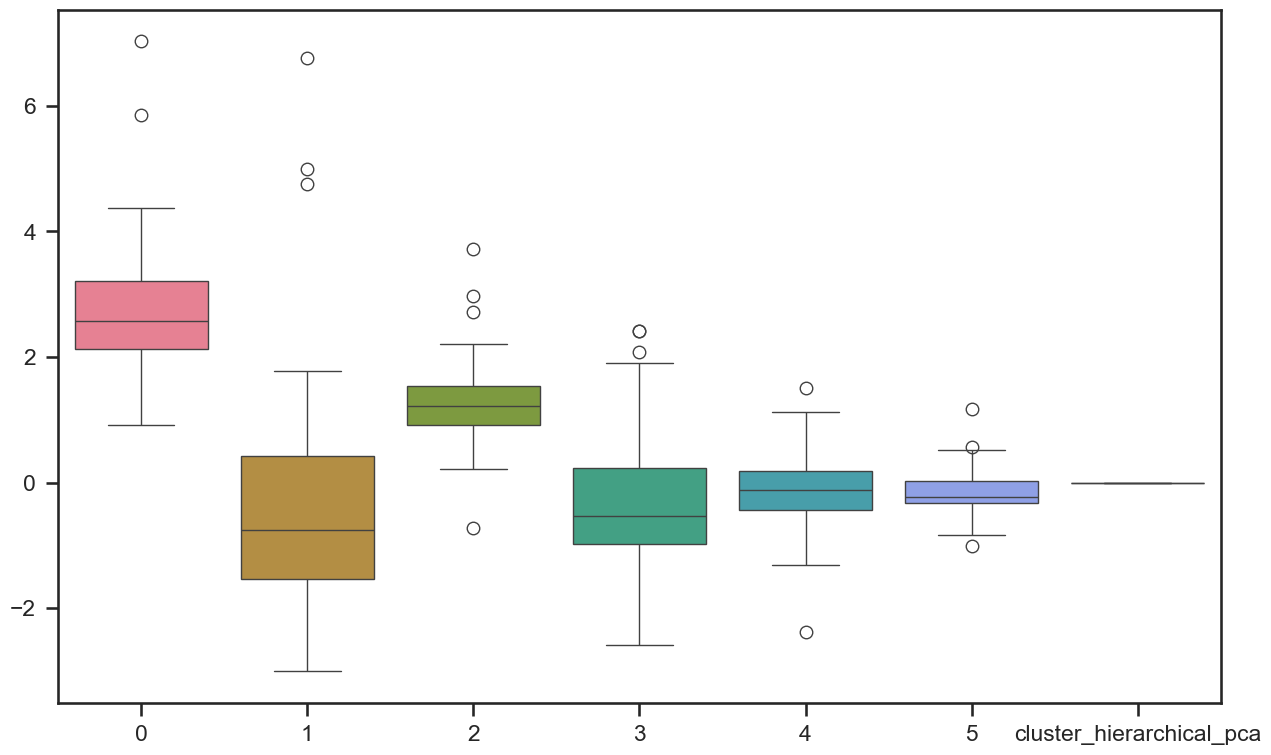

In [94]:
methods.report_clustering(df_pca, 'cluster_hierarchical_pca')

## Dendrograma Sem PCA

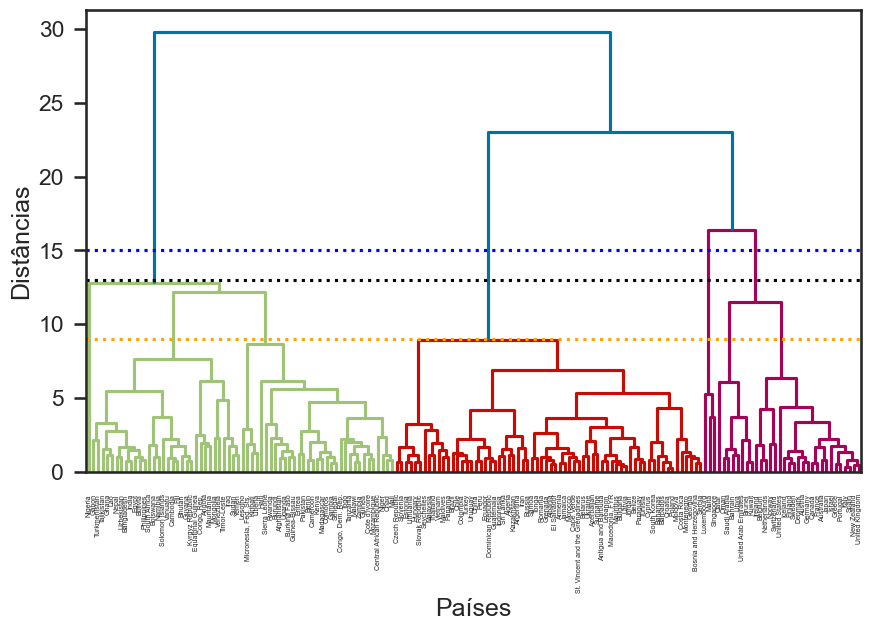

In [95]:
methods.dendrogram_visualization(df_scaled.set_index('country'), 'ward', 9, 13, 15)

## Dendrograma com PCA

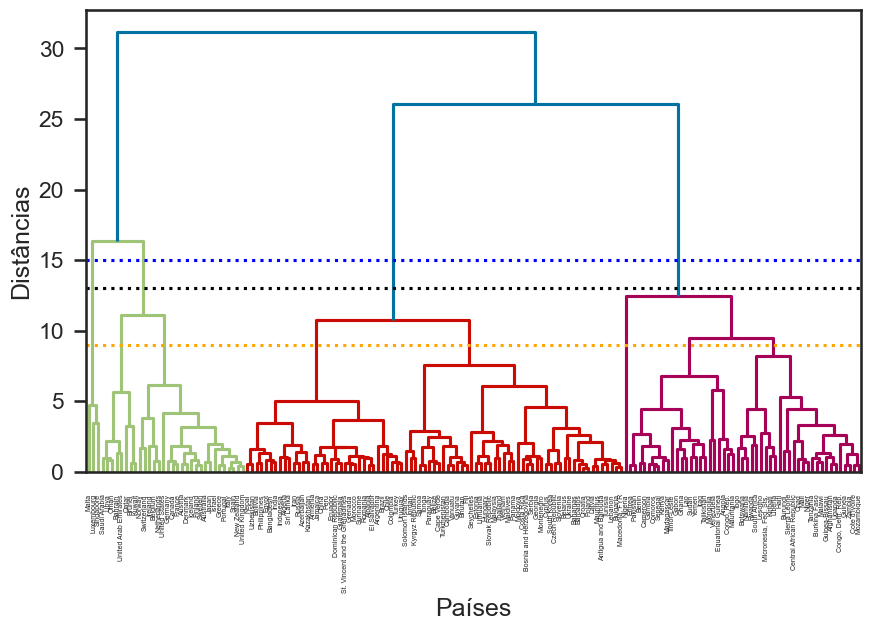

In [96]:
methods.dendrogram_visualization(df_pca.set_index('country'), 'ward', 9, 13, 15)

### Correlação cophenetic 

Esta medida compara as distâncias entre pares de pontos no dendrograma com as distâncias originais entre os pontos. Uma correlação cophenetic alta (máximo igual a 1) indica uma boa preservação das distâncias originais.

In [97]:
methods.cophenetic_index(df_pca.drop(columns='country'))

*********************************************
Correlação de cophenetic: 0.8762775627918303


## Sem PCA

In [98]:
df_best_point = df_scaled.set_index('country')

In [99]:
methods.best_point_numpy(df_best_point, 'cluster_hierarchical', 3)

O país com melhor ponto médio do cluster 0 é: FINLAND
O país com melhor ponto médio do cluster 1 é: GHANA
O país com melhor ponto médio do cluster 2 é: BULGARIA


### Conferindo o resultado usando Scipy

In [100]:
methods.best_point_scipy(df_best_point, 'cluster_hierarchical', 3)

O país com melhor ponto médio do cluster 0 é: FINLAND - Distância: 84.95018874197174
O país com melhor ponto médio do cluster 1 é: GHANA - Distância: 151.24596208239853
O país com melhor ponto médio do cluster 2 é: BULGARIA - Distância: 104.65750022390797


## Usando PCA

In [101]:
df_best_point_pca = df_pca.set_index('country')

In [102]:
methods.best_point_numpy(df_best_point_pca, 'cluster_hierarchical_pca', 3)

O país com melhor ponto médio do cluster 0 é: FINLAND
O país com melhor ponto médio do cluster 1 é: TANZANIA
O país com melhor ponto médio do cluster 2 é: SURINAME


### Conferindo o resultado usando Scipy

In [103]:
methods.best_point_scipy(df_best_point_pca, 'cluster_hierarchical_pca', 3)

O país com melhor ponto médio do cluster 0 é: FINLAND - Distância: 80.76845034470534
O país com melhor ponto médio do cluster 1 é: TANZANIA - Distância: 109.18884571614942
O país com melhor ponto médio do cluster 2 é: SURINAME - Distância: 125.51593660708352


## Medóides

### Sem PCA

In [104]:
methods.medoids_sklearn(df_best_point, 'cluster_hierarchical')

O medóide do cluster 0 é: FINLAND


O medóide do cluster 1 é: GHANA
O medóide do cluster 2 é: BULGARIA


### Com PCA

In [105]:
methods.medoids_sklearn(df_best_point_pca, 'cluster_hierarchical_pca')

O medóide do cluster 0 é: FINLAND
O medóide do cluster 1 é: TANZANIA
O medóide do cluster 2 é: SURINAME
